In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px 
import seaborn as sb
from sklearn import preprocessing 

In [2]:
# ref: https://www.geeksforgeeks.org/normalizing-textual-data-with-python/
def str_normalization(string):
    # import regex
    import re
    # convert to lower case
    lower_string = string.lower()
    # remove all punctuation except words and space
    no_punc_string = re.sub(r'[^\w\s]', '', lower_string)
    # remove white spaces
    no_wspace_string = no_punc_string.strip()
    # manually correction
    norm_string = no_wspace_string.replace('capitol hill happy hour','capitol hill terps happy hour')\
        .replace('engr terps networing event at bmi','engr terps networking event at bmi')\
        .replace('fall social montgomery county','fall social in montgomery county')\
        .replace('montgomery cty terps game watch','montgomery city terps game watch')\
        .replace('montgomery cty terps tpn','montgomery city terps tpn')\
        .replace('naples meet maryland lunch','meet maryland lunch naples')\
        .replace('sarasota meet maryland reception','meet maryland reception sarasota')\
        .replace('southern md terps game watch','southern maryland terps game watch')\
        .replace('prince georges terps wbb ste','prince georges terps wbb suite')\
        .replace('south florida terp bound','terp bound south florida')\
        .replace('chicago terp bound','terp bound chicago')\
        .replace('los angeles terp bound','terp bound los angeles')\
        .replace('philadelphia terp bound','terp bound philadelphia')\
        .replace('southern connecticut terp bound','terp bound southern connecticut')\
        .replace('lan homecoming tailgate','latino alumni network homecoming tailgate')\
        .replace('pg county wine tasting','prince georges terps wine tasting')\
        .replace('awards gala','alumni awards gala')\
        .replace('member facstaff luncheon','facultystaff member luncheon')\
        .replace('terps csuite alumni meet up','dc terps csuite alumni meet up')\
        .replace('lan brunch','latino alumni network brunch')\
        .replace('lbgtq  workplace inclusion','lbgtq and the workplace')
    return norm_string

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
excel_file = pd.ExcelFile('UMD Alumni Association Dataset.xlsx')
df = pd.DataFrame()
for sheet in excel_file.sheet_names:
    df = pd.concat([df, pd.read_excel(excel_file, sheet)])

/opt/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [5]:
df.index = pd.RangeIndex(start=1, stop=len(df.index) + 1, step=1)
# create column: combined for combining Activity Code, Event Name, Group Code together as identifier for events.
df['C'] = ''
df['APFTA'] = ''
df['APMP'] = ''
df['combined'] = ''
for i in df.index:
    df.loc[i, 'combined'] = df.loc[i, 'Activity Code']+' '\
                            +str_normalization(df.loc[i, 'Event Name'])+' '\
                            +df.loc[i, 'Group Code']

In [6]:
# rename columns
df.rename(columns={"Activity Code": "AC",\
                   "Location Code": "LC",\
                   "Group Code": "GC",\
                   "Participated": "P",\
                   "Average Age": "AA",\
                   "First Time Attendees": "FTA",\
                   "Percentage First Time Attendees": "PFTA",\
                   "Major Prospects": "MP",\
                   "Location Description": "LCD",\
                   "Percentage Major Prospect": "PMP"}, inplace=True, errors='ignore')
# drop description columns that are not used in analysis
df.drop(['Activity Description', "Group Description"], axis = 1, inplace = True, errors='ignore')
# put 4 digit limit to presentages
pd.set_option('precision', 4)
df

Event Name     AC    LC  \
1                              Ocean City Summer Party  PEZOC  PDES   
2    Neurodiversity on Campus and in the Workplace ...  PEAPC  POWE   
3                                Northern NJ Terps TPN  PEANJ  PNNJ   
4    Philly Terps: Young Alumni Happy Hour Summer S...  PEAP1  PNPH   
5             Philly Terps Suite Night at the Ballpark  PEAP4  PNPH   
6                              DFW Terps Baseball Game  PEADE  PWDF   
7       Jazz at LACMA: Larry Nash & the Jazz Symphonic  PEAJL  PWLA   
8                           San Diego Day at the Races  PEAND  PWSD   
9                                            APAAN BBQ  PEABQ  PDNA   
10                        Boston Terps Summer Send-Off  PEAB7  PNBO   
11               Comedy Night at Tickle Me Comedy Club  PEAVP  PWNA   
12   Career Conversation: Work Smarter, Not Harder ...  PEAC2  PDMC   
13                  Navigating the Home Buying Process  PEAPC  POWE   
14                        Union Station Tour and Taste  PEAU3  PDDC   
15                             Denver Terps Crab Feast  PEADC  PWDE   
16                  Terp Entrepreneur Networking Event  PEAE1  PDCP   
17                        Montgomery County Crab Feast  PEACR  PDMC   
18                     LA Terps Crab Feast and Cookout  PEAL3  PWLA   
19                     DC Terps C-Suite Alumni Meet Up  PEACA  PDNA   
20                                   Bootstrapped Live  PEAB8  PDDC   
21   Local Leaders: A Conversation with Roger Berko...  PEZLS  PNBO   
22                  Dallas Fort Worth Terps Game Watch  PEADW  PSDF   
23                     Montgomery Cty Terps Game Watch  PEAMC  PDMC   
24                               Philly Terps Tailgate  PEAP3  PNPH   
25                       NY Terps Yankees vs. Orioles   PEAYO  PNNY   
26              Foundations of Building Wealth Webinar  PEAFL  POWE   
27                   Day at the Farm: Butler's Orchard  PEABX  PDMC   
28              Northern Virginia Networking Breakfast  PEA2N  PDNV   
29                         Blue Ridge Terps Game Watch  PEARG  PDBR   
30                    Fall Social in Montgomery County  PEAFA  PDMC   
31   Tucson Terps: Joint Football Watch Party with ...  PEAT6  PWTU   
32   History of Civil Rights in Baltimore Walking Tour  PEAC4  PDBA   
33                        Southern MD Terps Crab Feast  PEASC  PDSO   
34    Implementing the Disney Culture in the Workplace  PEAD1  PDMC   
35   How to Write the Greatest Job Application of Y...  PEAPD  POWE   
36                                   Football Tailgate  PEZFT  PDON   
37                        Northern NJ Terps Game Watch  PEANW  PNNJ   
38                   Prince George's Terps Suite Party  PEASP  PDON   
39                      Terps in the San Francisco Bay  PEZSF  PWSF   
40                                         Terps in LA  PEZLH  PWLA   
41   Baltimore in the 21st Century: The Future of t...  PEAB9  PDBA   
42                    Baltimore Mornings with Maryland  PEABM  PDBA   
43                        Southern Maryland Happy Hour  PEAS6  PDSO   
44                  Dallas Fort Worth Terps Game Watch  PEADW  PSDF   
45                                 DC Terps Game Watch  PEADG  PDDC   
46                            Eastern Shore Game Watch  PEAE2  PDES   
47                        Northern NJ Terps Game Watch  PEANW  PNNJ   
48                                   NetWorkout Boston  PEAN2  PNBO   
49                    Mornings with Maryland Northeast  PEAMW  PNBO   
50                                   NetNite UMBA 2019  PEAUN  PDON   
51                         UMD Staff Alumni Happy Hour  PEASA  PDON   
52                             LAN Homecoming Tailgate  PEAU1  PDON   
53                                San Diego Game Watch  PEADX  PWSD   
54       Seattle Terps: Green Seattle Day at the Parks  PEAGD  PWSE   
55        African American History Campus Walking Tour  PEAAA  PDON   
56                 Homecoming Student & Alumnae Brunch  PEAA5  PDON 

In [38]:
# df['Event Date'].dtypes
df['EM'] = pd.DatetimeIndex(df['Event Date']).month
df.head(10)

Event Name     AC    LC  \
1                             Ocean City Summer Party  PEZOC  PDES   
2   Neurodiversity on Campus and in the Workplace ...  PEAPC  POWE   
3                               Northern NJ Terps TPN  PEANJ  PNNJ   
4   Philly Terps: Young Alumni Happy Hour Summer S...  PEAP1  PNPH   
5            Philly Terps Suite Night at the Ballpark  PEAP4  PNPH   
6                          San Diego Day at the Races  PEAND  PWSD   
7                                           APAAN BBQ  PEABQ  PDNA   
8                        Boston Terps Summer Send-Off  PEAB7  PNBO   
9   Career Conversation: Work Smarter, Not Harder ...  PEAC2  PDMC   
10                 Navigating the Home Buying Process  PEAPC  POWE   

                          LCD   GC Event Date   P  AA  FTA    PFTA  MP  \
1        CP DMV-Eastern Shore  PS9 2019-07-06  63  52    5  0.0794  12   
2           CP Online-Webinar  PC9 2019-07-10   7  56    1  0.1429   0   
3            CP Northeast-NNJ  PC9 2019-07-11  28  45    2  0.0714   2   
4   CP Northeast-Philadelphia  PS9 2019-07-11   3  34    0  0.0000   0   
5   CP Northeast-Philadelphia  PS9 2019-07-14  22  38    3  0.1364   0   
6           CP West-San Diego  PS9 2019-07-20  13  49    0  0.0000   0   
7              CP DMV-General  PSA 2019-08-04  32  33    0  0.0000   0   
8         CP Northeast-Boston  PSZ 2019-08-04   6  27    0  0.0000   0   
9    CP DMV-Montgomery County  PC9 2019-08-14  22  40    1  0.0455   1   
10          CP Online-Webinar  PC9 2019-08-14  62  34    5  0.0806   0   

       PMP  C   APFTA    APMP  \
1   0.1905  2  0.1807   0.185   
2   0.0000  1  0.1429     0.0   
3   0.0714  3  0.1567  0.1017   
4   0.0000  2  0.0714     0.0   
5   0.0000  1  0.1364     0.0   
6   0.0000  1     0.0     0.0   
7   0.0000  6  0.2841  0.0036   
8   0.0000  1     0.0     0.0   
9   0.0455  1  0.0455  0.0455   
10  0.0000  1  0.0806     0.0   

                                             combined  EM calculation Online  \
1                   PEZOC ocean city summer party PS9   7      2.4034     No   
2   PEAPC neurodiversity on campus and in the work...   7      0.5083    Yes   
3                     PEANJ northern nj terps tpn PC9   7      1.5258     No   
4   PEAP1 philly terps young alumni happy hour sum...   7      0.2542     No   
5   PEAP4 philly terps suite night at the ballpark...   7      0.4852     No   
6                PEAND san diego day at the races PS9   7         0.0     No   
7                                 PEABQ apaan bbq PSA   8      1.0454     No   
8               PEAB7 boston terps summer sendoff PSZ   8         0.0     No   
9   PEAC2 career conversation work smarter not har...   8      0.5943     No   
10       PEAPC navigating the home buying process PC9   8       0.287    Yes   

    No  Yes  
1    1    0  
2    0    1  
3    1    0  
4    1    0  
5    1    0  
6    1    0  
7    1    0  
8    1    0  
9    1    0  
10   0    1

In [8]:
grouped = df.groupby(df['combined']).size().to_frame('count').sort_values('count', ascending=False)
print(grouped)
# print(grouped.index)
# print(grouped.columns)
df

                                                    count
combined                                                 
PEABG baltimore terps game watch PA9                   14
PEADG dc terps game watch PA9                          12
PEASW seattle terps game watch PA9                     11
PEAMC montgomery city terps game watch PA9             10
PEANG ny terps game watch PA9                           9
PEZFT football tailgate PA9                             8
PEAGW denver terps game watch PS9                       7
PEZRC ring ceremony PSS                                 6
PEACA dc dc terps csuite alumni meet up PC4             6
PEABQ apaan bbq PSA                                     6
PEANW northern nj terps game watch PA9                  6
PEZMB member basketball pregame event PHM               5
PEZMM maryland in manhattan PS9                         5
PEANT ny terps tpn PC9                                  5
PEAOH football alumni zone open houses PAZ              5
PEZ50 50th reu

Event Name     AC    LC  \
1                              Ocean City Summer Party  PEZOC  PDES   
2    Neurodiversity on Campus and in the Workplace ...  PEAPC  POWE   
3                                Northern NJ Terps TPN  PEANJ  PNNJ   
4    Philly Terps: Young Alumni Happy Hour Summer S...  PEAP1  PNPH   
5             Philly Terps Suite Night at the Ballpark  PEAP4  PNPH   
6                              DFW Terps Baseball Game  PEADE  PWDF   
7       Jazz at LACMA: Larry Nash & the Jazz Symphonic  PEAJL  PWLA   
8                           San Diego Day at the Races  PEAND  PWSD   
9                                            APAAN BBQ  PEABQ  PDNA   
10                        Boston Terps Summer Send-Off  PEAB7  PNBO   
11               Comedy Night at Tickle Me Comedy Club  PEAVP  PWNA   
12   Career Conversation: Work Smarter, Not Harder ...  PEAC2  PDMC   
13                  Navigating the Home Buying Process  PEAPC  POWE   
14                        Union Station Tour and Taste  PEAU3  PDDC   
15                             Denver Terps Crab Feast  PEADC  PWDE   
16                  Terp Entrepreneur Networking Event  PEAE1  PDCP   
17                        Montgomery County Crab Feast  PEACR  PDMC   
18                     LA Terps Crab Feast and Cookout  PEAL3  PWLA   
19                     DC Terps C-Suite Alumni Meet Up  PEACA  PDNA   
20                                   Bootstrapped Live  PEAB8  PDDC   
21   Local Leaders: A Conversation with Roger Berko...  PEZLS  PNBO   
22                  Dallas Fort Worth Terps Game Watch  PEADW  PSDF   
23                     Montgomery Cty Terps Game Watch  PEAMC  PDMC   
24                               Philly Terps Tailgate  PEAP3  PNPH   
25                       NY Terps Yankees vs. Orioles   PEAYO  PNNY   
26              Foundations of Building Wealth Webinar  PEAFL  POWE   
27                   Day at the Farm: Butler's Orchard  PEABX  PDMC   
28              Northern Virginia Networking Breakfast  PEA2N  PDNV   
29                         Blue Ridge Terps Game Watch  PEARG  PDBR   
30                    Fall Social in Montgomery County  PEAFA  PDMC   
31   Tucson Terps: Joint Football Watch Party with ...  PEAT6  PWTU   
32   History of Civil Rights in Baltimore Walking Tour  PEAC4  PDBA   
33                        Southern MD Terps Crab Feast  PEASC  PDSO   
34    Implementing the Disney Culture in the Workplace  PEAD1  PDMC   
35   How to Write the Greatest Job Application of Y...  PEAPD  POWE   
36                                   Football Tailgate  PEZFT  PDON   
37                        Northern NJ Terps Game Watch  PEANW  PNNJ   
38                   Prince George's Terps Suite Party  PEASP  PDON   
39                      Terps in the San Francisco Bay  PEZSF  PWSF   
40                                         Terps in LA  PEZLH  PWLA   
41   Baltimore in the 21st Century: The Future of t...  PEAB9  PDBA   
42                    Baltimore Mornings with Maryland  PEABM  PDBA   
43                        Southern Maryland Happy Hour  PEAS6  PDSO   
44                  Dallas Fort Worth Terps Game Watch  PEADW  PSDF   
45                                 DC Terps Game Watch  PEADG  PDDC   
46                            Eastern Shore Game Watch  PEAE2  PDES   
47                        Northern NJ Terps Game Watch  PEANW  PNNJ   
48                                   NetWorkout Boston  PEAN2  PNBO   
49                    Mornings with Maryland Northeast  PEAMW  PNBO   
50                                   NetNite UMBA 2019  PEAUN  PDON   
51                         UMD Staff Alumni Happy Hour  PEASA  PDON   
52                             LAN Homecoming Tailgate  PEAU1  PDON   
53                                San Diego Game Watch  PEADX  PWSD   
54       Seattle Terps: Green Seattle Day at the Parks  PEAGD  PWSE   
55        African American History Campus Walking Tour  PEAAA  PDON   
56                 Homecoming Student & Alumnae Brunch  PEAA5  PDON 

In [9]:
# intialise data of lists.
factors = {'combined':[],'P':[],'PFTA':[],'PMP':[]}
  
# Create DataFrame to count if events show factor growths when they are held again.
count_growing = pd.DataFrame(factors)
count_growing

Empty DataFrame
Columns: [combined, P, PFTA, PMP]
Index: []

Event name:  Baltimore Terps Game Watch 
Activity Code:  PEABG 
Location Code:  PDBA 
Group Code:  PA9
    Event Date   P  AA  FTA    PFTA  MP     PMP   C   APFTA    APMP
538 2014-10-25  24  35   14  0.5833   0  0.0000  14  0.2788  0.0062
547 2014-11-22  11  36    7  0.6364   0  0.0000  14  0.2788  0.0062
572 2015-02-14  71  33   34  0.4789   2  0.0282  14  0.2788  0.0062
581 2015-03-13  17  34    5  0.2941   1  0.0588  14  0.2788  0.0062
413 2017-01-28  10  33    2  0.2000   0  0.0000  14  0.2788  0.0062
388 2018-05-20   4  35    2  0.5000   0  0.0000  14  0.2788  0.0062
90  2018-09-01   5  40    2  0.4000   0  0.0000  14  0.2788  0.0062
98  2018-09-08   9  37    1  0.1111   0  0.0000  14  0.2788  0.0062
137 2018-10-20  10  32    1  0.1000   0  0.0000  14  0.2788  0.0062
160 2018-11-24  10  36    0  0.0000   0  0.0000  14  0.2788  0.0062
179 2019-01-11  13  34    2  0.1538   0  0.0000  14  0.2788  0.0062
185 2019-01-21  16  34    3  0.1875   0  0.0000  14  0.2788  0.0062
195 2019-02-0

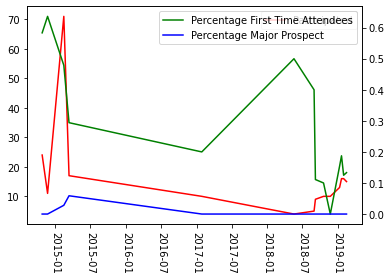


Event name:  DC Terps Game Watch 
Activity Code:  PEADG 
Location Code:  PDDC 
Group Code:  PA9
    Event Date   P  AA  FTA    PFTA  MP     PMP   C   APFTA    APMP
548 2014-11-22  26  29    9  0.3462   2  0.0769  12  0.3207  0.0138
579 2015-03-03  56  30   27  0.4821   1  0.0179  12  0.3207  0.0138
582 2015-03-13  64  29   39  0.6094   1  0.0156  12  0.3207  0.0138
588 2015-03-20  36  28   17  0.4722   0  0.0000  12  0.3207  0.0138
468 2016-01-02  35  28   14  0.4000   0  0.0000  12  0.3207  0.0138
469 2016-01-09  28  27   14  0.5000   0  0.0000  12  0.3207  0.0138
470 2016-01-12   3  26    0  0.0000   0  0.0000  12  0.3207  0.0138
473 2016-01-31  21  26    5  0.2381   0  0.0000  12  0.3207  0.0138
475 2016-02-27   9  29    1  0.1111   0  0.0000  12  0.3207  0.0138
479 2016-03-06   8  28    2  0.2500   0  0.0000  12  0.3207  0.0138
167 2018-12-06  18  30    3  0.1667   1  0.0556  12  0.3207  0.0138
45  2019-10-26  11  32    3  0.2727   0  0.0000  12  0.3207  0.0138


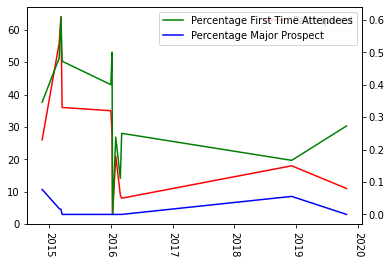


Event name:  Seattle Terps Game Watch 
Activity Code:  PEASW 
Location Code:  PWSE 
Group Code:  PA9
    Event Date  P  AA  FTA    PFTA  MP  PMP   C   APFTA    APMP
480 2016-03-06  5  41    1  0.2000   0  0.0  11  0.1242  0.0455
319 2018-01-28  2  43    0  0.0000   0  0.0  11  0.1242  0.0455
328 2018-02-17  2  45    0  0.0000   0  0.0  11  0.1242  0.0455
337 2018-03-04  2  41    0  0.0000   1  0.5  11  0.1242  0.0455
345 2018-03-18  5  35    0  0.0000   0  0.0  11  0.1242  0.0455
134 2018-10-13  3  36    3  1.0000   0  0.0  11  0.1242  0.0455
159 2018-11-17  6  43    1  0.1667   0  0.0  11  0.1242  0.0455
197 2019-02-01  7  36    0  0.0000   0  0.0  11  0.1242  0.0455
223 2019-03-03  7  36    0  0.0000   0  0.0  11  0.1242  0.0455
237 2019-03-23  3  38    0  0.0000   0  0.0  11  0.1242  0.0455
62  2019-11-09  3  42    0  0.0000   0  0.0  11  0.1242  0.0455


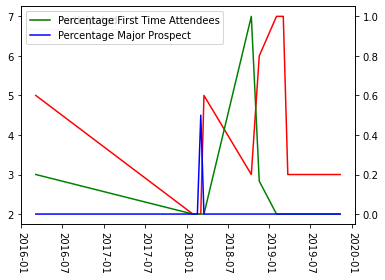


Event name:  Montgomery Cty Terps Game Watch  
Activity Code:  PEAMC 
Location Code:  PDMC 
Group Code:  PA9
    Event Date    P  AA  FTA    PFTA  MP     PMP   C   APFTA    APMP
558 2014-12-30  105  42   55  0.5238  16  0.1524  10  0.2928  0.1025
583 2015-03-13   54  44   30  0.5556  12  0.2222  10  0.2928  0.1025
446 2015-10-10   14  50    7  0.5000   2  0.1429  10  0.2928  0.1025
324 2018-02-07   16  52    3  0.1875   4  0.2500  10  0.2928  0.1025
121 2018-10-05   18  38    8  0.4444   0  0.0000  10  0.2928  0.1025
123 2018-10-06   19  32    8  0.4211   0  0.0000  10  0.2928  0.1025
187 2019-01-21   18  33    3  0.1667   0  0.0000  10  0.2928  0.1025
206 2019-02-16   35  46    2  0.0571   2  0.0571  10  0.2928  0.1025
23  2019-09-14   14  40    1  0.0714   0  0.0000  10  0.2928  0.1025
60  2019-11-09    5  47    0  0.0000   1  0.2000  10  0.2928  0.1025


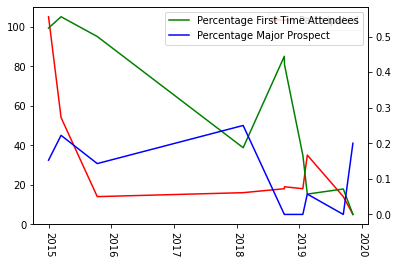


Event name:  NY Terps Game Watch 
Activity Code:  PEANG 
Location Code:  PNNY 
Group Code:  PA9
    Event Date    P  AA  FTA    PFTA  MP     PMP  C  APFTA    APMP
559 2014-12-30   28  32    7  0.2500   3  0.1071  9  0.157  0.0501
79  2018-08-03    4  34    2  0.5000   1  0.2500  9  0.157  0.0501
91  2018-09-01   11  28    1  0.0909   0  0.0000  9  0.157  0.0501
106 2018-09-15   25  26    7  0.2800   1  0.0400  9  0.157  0.0501
112 2018-09-22    2  31    0  0.0000   0  0.0000  9  0.157  0.0501
124 2018-10-06   20  25    4  0.2000   0  0.0000  9  0.157  0.0501
149 2018-11-03    8  37    0  0.0000   0  0.0000  9  0.157  0.0501
163 2018-11-28   17  28    0  0.0000   0  0.0000  9  0.157  0.0501
192 2019-01-26  206  37   19  0.0922  11  0.0534  9  0.157  0.0501


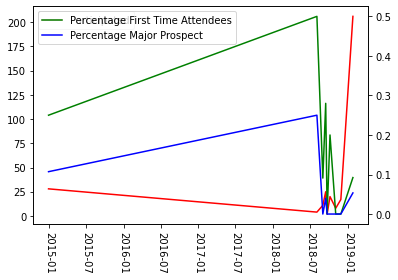


Event name:  Football Tailgate 
Activity Code:  PEZFT 
Location Code:  PDON 
Group Code:  PA9
    Event Date    P  AA  FTA    PFTA  MP     PMP  C   APFTA    APMP
527 2014-10-04  118  45   58  0.4915  25  0.2119  8  0.2829  0.1682
546 2014-11-15  144  48   55  0.3819  33  0.2292  8  0.2829  0.1682
443 2015-10-03   93  51   20  0.2151  16  0.1720  8  0.2829  0.1682
448 2015-10-24  190  48   82  0.4316  41  0.2158  8  0.2829  0.1682
409 2016-10-22  112  50   44  0.3929  24  0.2143  8  0.2829  0.1682
411 2016-11-12  116  48   30  0.2586  25  0.2155  8  0.2829  0.1682
36  2019-10-19   92  52    6  0.0652   8  0.0870  8  0.2829  0.1682
69  2019-11-23   38  54    1  0.0263   0  0.0000  8  0.2829  0.1682


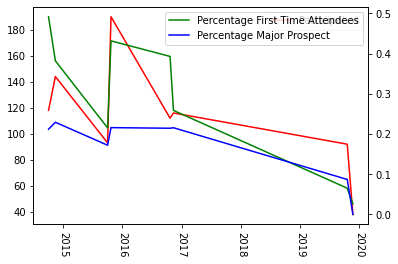


Event name:  Denver Terps Game Watch 
Activity Code:  PEAGW 
Location Code:  PWDE 
Group Code:  PS9
    Event Date   P  AA  FTA    PFTA  MP     PMP  C   APFTA    APMP
472 2016-01-23  22  38   14  0.6364   0  0.0000  7  0.3036  0.0089
474 2016-02-21  10  36    4  0.4000   0  0.0000  7  0.3036  0.0089
483 2016-03-11  13  36    3  0.2308   0  0.0000  7  0.3036  0.0089
485 2016-03-18   5  36    0  0.0000   0  0.0000  7  0.3036  0.0089
486 2016-03-20  16  43    5  0.3125   1  0.0625  7  0.3036  0.0089
489 2016-03-24  11  38    6  0.5455   0  0.0000  7  0.3036  0.0089
186 2019-01-21   7  41    0  0.0000   0  0.0000  7  0.3036  0.0089


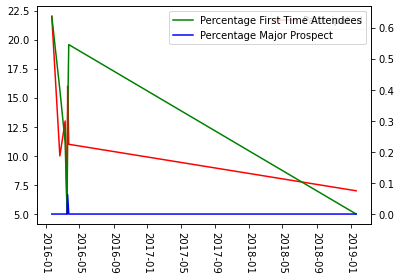


Event name:  Ring Ceremony  
Activity Code:  PEZRC 
Location Code:  PDON 
Group Code:  PSS
    Event Date    P  AA  FTA    PFTA  MP     PMP  C   APFTA   APMP
620 2014-05-21   68  29    0  0.0000   4  0.0588  6  0.5176  0.042
606 2015-05-20  185  51  113  0.6108  33  0.1784  6  0.5176  0.042
503 2016-05-02   68  26   54  0.7941   1  0.0147  6  0.5176  0.042
431 2017-05-08   33  24   28  0.8485   0  0.0000  6  0.5176  0.042
373 2018-04-24   61  25   52  0.8525   0  0.0000  6  0.5176  0.042
263 2019-04-23   42  24    0  0.0000   0  0.0000  6  0.5176  0.042


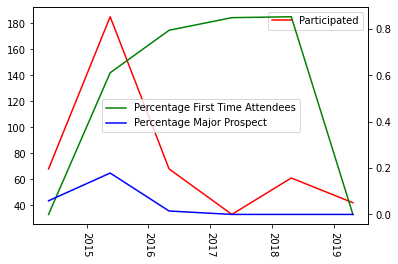


Event name:  DC Terps C-Suite Alumni Meet Up 
Activity Code:  PEACA 
Location Code:  PDNA 
Group Code:  PC4
    Event Date   P  AA  FTA    PFTA  MP     PMP  C   APFTA    APMP
87  2018-08-22  11  50   10  0.9091   9  0.8182  6  0.3297  0.4724
116 2018-09-27  13  49    8  0.6154   8  0.6154  6  0.3297  0.4724
150 2018-11-05   8  49    0  0.0000   3  0.3750  6  0.3297  0.4724
189 2019-01-24  15  51    3  0.2000   4  0.2667  6  0.3297  0.4724
248 2019-04-03  14  50    2  0.1429   7  0.5000  6  0.3297  0.4724
19  2019-08-27  27  50    3  0.1111   7  0.2593  6  0.3297  0.4724


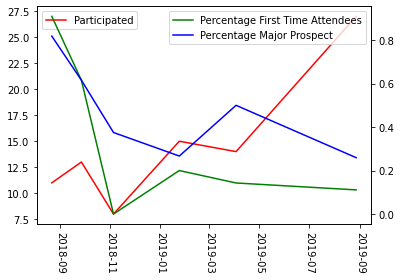


Event name:  APAAN BBQ 
Activity Code:  PEABQ 
Location Code:  PDNA 
Group Code:  PSA
    Event Date   P  AA  FTA    PFTA  MP     PMP  C   APFTA    APMP
521 2014-09-07  45  30   25  0.5556   0  0.0000  6  0.2841  0.0036
436 2015-08-16  26  31   10  0.3846   0  0.0000  6  0.2841  0.0036
405 2016-08-07  30  32   11  0.3667   0  0.0000  6  0.2841  0.0036
108 2018-09-16  46  35   17  0.3696   1  0.0217  6  0.2841  0.0036
279 2019-06-13  71  43    2  0.0282   0  0.0000  6  0.2841  0.0036
9   2019-08-04  32  33    0  0.0000   0  0.0000  6  0.2841  0.0036


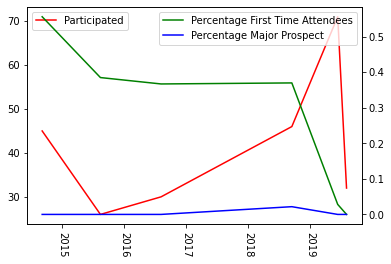


Event name:  Northern NJ Terps Game Watch  
Activity Code:  PEANW 
Location Code:  PNNJ 
Group Code:  PA9
    Event Date   P  AA  FTA    PFTA  MP     PMP  C   APFTA    APMP
571 2015-02-11  10  45    1  0.1000   3  0.3000  6  0.0444  0.1845
111 2018-09-22   6  45    1  0.1667   1  0.1667  6  0.0444  0.1845
178 2019-01-05  21  45    0  0.0000   1  0.0476  6  0.0444  0.1845
236 2019-03-21   7  47    0  0.0000   1  0.1429  6  0.0444  0.1845
37  2019-10-19   5  45    0  0.0000   1  0.2000  6  0.0444  0.1845
47  2019-10-26   4  59    0  0.0000   1  0.2500  6  0.0444  0.1845


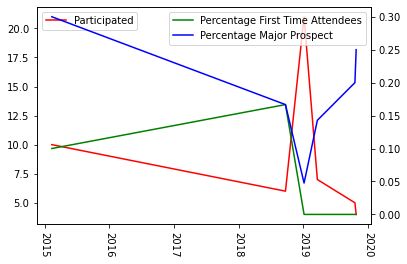


Event name:  Member Basketball Pregame Event  
Activity Code:  PEZMB 
Location Code:  PDON 
Group Code:  PHM
    Event Date    P  AA  FTA    PFTA  MP     PMP  C   APFTA    APMP
569 2015-02-08  123  52   60  0.4878  31  0.2520  5  0.2623  0.2095
477 2016-02-28  101  53   20  0.1980  24  0.2376  5  0.2623  0.2095
417 2017-02-26  145  52   51  0.3517  26  0.1793  5  0.2623  0.2095
334 2018-02-25  131  52   33  0.2519  40  0.3053  5  0.2623  0.2095
221 2019-03-02  137  53    3  0.0219  10  0.0730  5  0.2623  0.2095


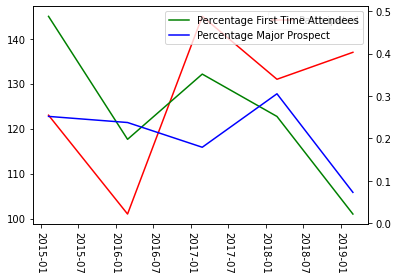


Event name:  Maryland in Manhattan  
Activity Code:  PEZMM 
Location Code:  PNNY 
Group Code:  PS9
    Event Date    P  AA  FTA    PFTA  MP     PMP  C   APFTA    APMP
614 2014-04-24  222  38    0  0.0000  66  0.2973  5  0.0993  0.2396
602 2015-04-23  265  39   53  0.2000  60  0.2264  5  0.0993  0.2396
496 2016-04-14  232  42   57  0.2457  61  0.2629  5  0.0993  0.2396
374 2018-04-25  241  44    0  0.0000  64  0.2656  5  0.0993  0.2396
257 2019-04-10  315  42   16  0.0508  46  0.1460  5  0.0993  0.2396


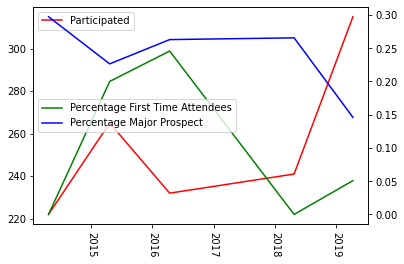


Event name:  NY Terps TPN 
Activity Code:  PEANT 
Location Code:  PNNY 
Group Code:  PC9
    Event Date   P  AA  FTA    PFTA  MP     PMP  C   APFTA    APMP
522 2014-09-12  28  35   11  0.3929   4  0.1429  5  0.2119  0.1687
535 2014-10-22  38  38    7  0.1842   6  0.1579  5  0.2119  0.1687
543 2014-11-11  31  34    7  0.2258   3  0.0968  5  0.2119  0.1687
570 2015-02-10  34  40    6  0.1765   7  0.2059  5  0.2119  0.1687
592 2015-04-07  25  39    2  0.0800   6  0.2400  5  0.2119  0.1687


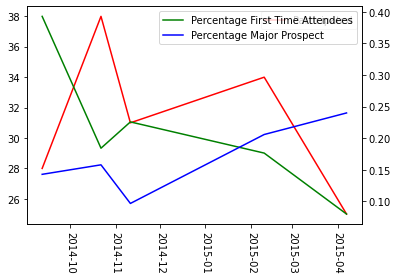


Event name:  Football Alumni Zone Open Houses 
Activity Code:  PEAOH 
Location Code:  PDON 
Group Code:  PAZ
    Event Date   P  AA  FTA    PFTA  MP     PMP  C  APFTA    APMP
105 2018-09-15  26  56   19  0.7308   8  0.3077  5    0.4  0.1688
110 2018-09-22  28  49   15  0.5357   6  0.2143  5    0.4  0.1688
142 2018-10-27  34  39   17  0.5000   3  0.0882  5    0.4  0.1688
148 2018-11-03  14  49    2  0.1429   2  0.1429  5    0.4  0.1688
158 2018-11-17  11  52    1  0.0909   1  0.0909  5    0.4  0.1688


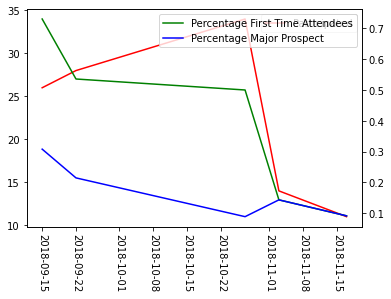


Event name:  50th Reunion  
Activity Code:  PEZ50 
Location Code:  PDON 
Group Code:  PS3
    Event Date   P  AA  FTA    PFTA  MP     PMP  C   APFTA    APMP
619 2014-05-21  76  67    0  0.0000  27  0.3553  5  0.3042  0.3095
605 2015-05-20  96  69   40  0.4167  30  0.3125  5  0.3042  0.3095
509 2016-05-18  87  60   33  0.3793  25  0.2874  5  0.3042  0.3095
433 2017-05-20  47  72   18  0.3830  13  0.2766  5  0.3042  0.3095
390 2018-05-20  38  66   13  0.3421  12  0.3158  5  0.3042  0.3095


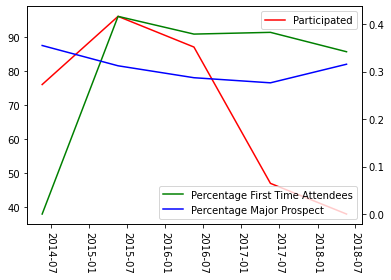


Event name:  DFW Terps Game Watch 
Activity Code:  PEADW 
Location Code:  PSDF 
Group Code:  PS9
    Event Date   P  AA  FTA  PFTA  MP     PMP  C   APFTA    APMP
332 2018-02-24   6  45    3  0.50   0  0.0000  4  0.1875  0.1667
132 2018-10-13   4  56    1  0.25   1  0.2500  4  0.1875  0.1667
205 2019-02-16   6  55    0  0.00   1  0.1667  4  0.1875  0.1667
222 2019-03-03  12  48    0  0.00   3  0.2500  4  0.1875  0.1667


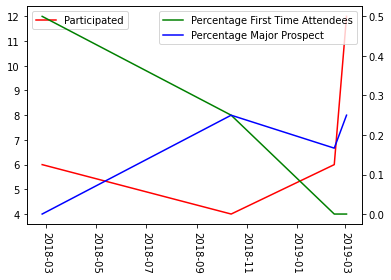


Event name:  Homecoming Tailgate 
Activity Code:  PEZHC 
Location Code:  PDON 
Group Code:  PA9
    Event Date    P  AA  FTA    PFTA  MP     PMP  C   APFTA    APMP
531 2014-10-18  418  47  191  0.4569  81  0.1938  4  0.2801  0.1691
454 2015-11-07  343  46  108  0.3149  66  0.1924  4  0.2801  0.1691
407 2016-10-01  347  46  121  0.3487  60  0.1729  4  0.2801  0.1691
301 2017-10-21  597  42    0  0.0000  70  0.1173  4  0.2801  0.1691


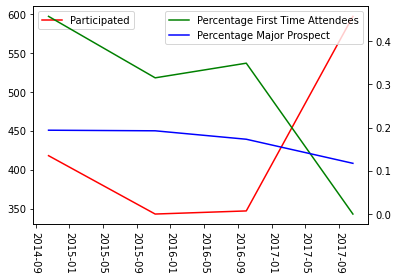


Event name:  Financial Wealth Steps Series 
Activity Code:  PEAFL 
Location Code:  POWE 
Group Code:  PC4
    Event Date   P  AA  FTA    PFTA  MP     PMP  C   APFTA    APMP
383 2018-05-09  31  39    9  0.2903   1  0.0323  4  0.1502  0.0685
384 2018-05-16  27  39    3  0.1111   2  0.0741  4  0.1502  0.0685
391 2018-05-23  26  39    4  0.1538   2  0.0769  4  0.1502  0.0685
393 2018-05-30  22  39    1  0.0455   2  0.0909  4  0.1502  0.0685


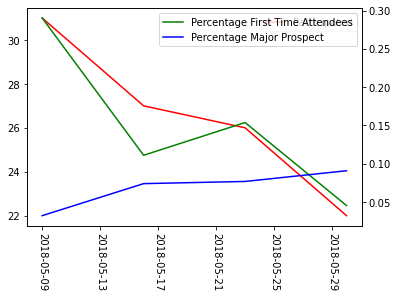


Event name:  DC Terps Happy Hour  
Activity Code:  PEADH 
Location Code:  PDDC 
Group Code:  PS9
    Event Date   P  AA  FTA    PFTA  MP     PMP  C   APFTA  APMP
561 2015-01-15  27  50   15  0.5556  12  0.4444  4  0.2287  0.16
596 2015-04-16  13  39    2  0.1538   2  0.1538  4  0.2287  0.16
176 2018-12-15  14  33    2  0.1429   0  0.0000  4  0.2287  0.16
284 2019-06-17  48  37    3  0.0625   2  0.0417  4  0.2287  0.16


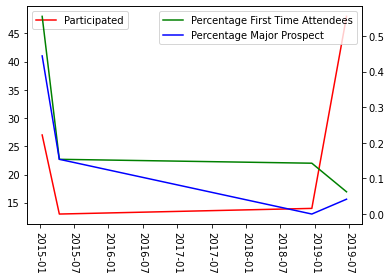


Event name:  Prince George's Terps Wine Tasting 
Activity Code:  PEAWT 
Location Code:  PDON 
Group Code:  PS9
    Event Date   P  AA  FTA    PFTA  MP     PMP  C   APFTA    APMP
593 2015-04-10  45  52   18  0.4000  12  0.2667  4  0.1561  0.2536
505 2016-05-06  49  47   11  0.2245  14  0.2857  4  0.1561  0.2536
428 2017-04-08  43  55    0  0.0000  17  0.3953  4  0.1561  0.2536
258 2019-04-11  45  51    0  0.0000   3  0.0667  4  0.1561  0.2536


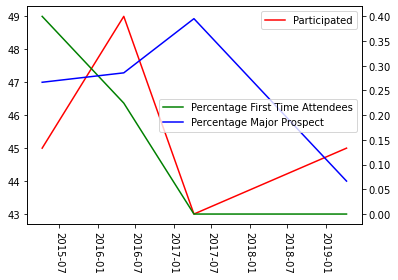


Event name:  Dinner for 12 Terps 
Activity Code:  PE788 
Location Code:  PWSF 
Group Code:  PSZ
    Event Date   P  AA  FTA    PFTA  MP     PMP  C   APFTA    APMP
533 2014-10-20  23  49    6  0.2609  11  0.4783  4  0.3425  0.4505
534 2014-10-22  37  51   10  0.2703  20  0.5405  4  0.3425  0.4505
536 2014-10-23  18  40    7  0.3889   6  0.3333  4  0.3425  0.4505
537 2014-10-25  20  55    9  0.4500   9  0.4500  4  0.3425  0.4505


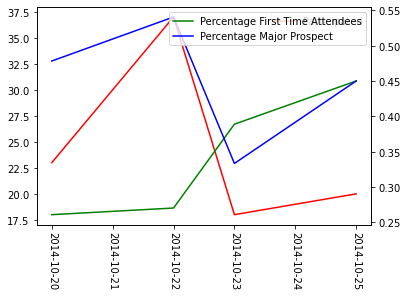


Event name:  GradBash 
Activity Code:  PEZGB 
Location Code:  PDON 
Group Code:  PSS
    Event Date    P  AA  FTA    PFTA  MP     PMP  C   APFTA    APMP
502 2016-05-02  122  22   89  0.7295   0  0.0000  4  0.5846  0.0004
430 2017-05-08  346  22  261  0.7543   0  0.0000  4  0.5846  0.0004
372 2018-04-24  629  22  507  0.8060   0  0.0000  4  0.5846  0.0004
262 2019-04-23  577  22   28  0.0485   1  0.0017  4  0.5846  0.0004


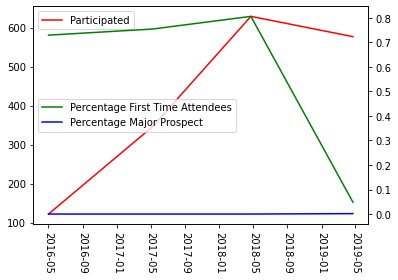


Event name:  Blue Ridge Terps Game Watch  
Activity Code:  PEARG 
Location Code:  PDBR 
Group Code:  PA9
    Event Date   P  AA  FTA    PFTA  MP     PMP  C   APFTA    APMP
589 2015-03-20   7  59    2  0.2857   1  0.1429  4  0.0714  0.0357
204 2019-02-16  13  40    0  0.0000   0  0.0000  4  0.0714  0.0357
29  2019-10-12   3  42    0  0.0000   0  0.0000  4  0.0714  0.0357
59  2019-11-09   7  43    0  0.0000   0  0.0000  4  0.0714  0.0357


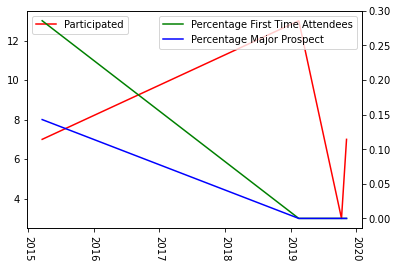


Event name:  San Francisco Terps Happy Hour  
Activity Code:  PEASG 
Location Code:  PWSF 
Group Code:  PS9
    Event Date   P  AA  FTA    PFTA  MP     PMP  C   APFTA    APMP
566 2015-02-05  11  34    5  0.4545   2  0.1818  4  0.2039  0.0767
329 2018-02-21  16  33    4  0.2500   2  0.1250  4  0.2039  0.0767
182 2019-01-14   9  32    1  0.1111   0  0.0000  4  0.2039  0.0767
261 2019-04-18  15  32    0  0.0000   0  0.0000  4  0.2039  0.0767


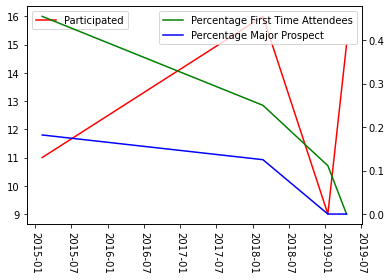


Event name:  Terps on the Hill 
Activity Code:  PEZTH 
Location Code:  PDDC 
Group Code:  PD9
    Event Date    P  AA  FTA    PFTA  MP     PMP  C   APFTA    APMP
621 2014-06-12  118  34    0  0.0000  16  0.1356  4  0.1628  0.1085
513 2016-06-13  217  36   74  0.3410  20  0.0922  4  0.1628  0.1085
291 2017-07-12  163  38   41  0.2515  24  0.1472  4  0.1628  0.1085
286 2019-06-19  119  39    7  0.0588   7  0.0588  4  0.1628  0.1085


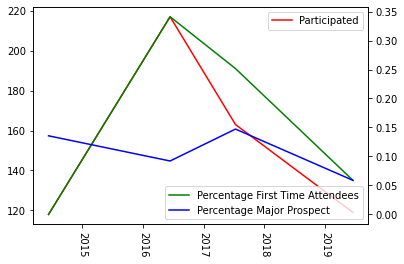


Event name:  Terp Service Month Historic  
Activity Code:  PEATS 
Location Code:  P9NA 
Group Code:  PO9
    Event Date   P  AA  FTA    PFTA  MP     PMP  C  APFTA    APMP
595 2015-04-11  28  42   11  0.3929   3  0.1071  4  0.371  0.1828
599 2015-04-18   9  47    5  0.5556   2  0.2222  4  0.371  0.1828
600 2015-04-19  16  35    4  0.2500   3  0.1875  4  0.371  0.1828
603 2015-04-25  14  39    4  0.2857   3  0.2143  4  0.371  0.1828


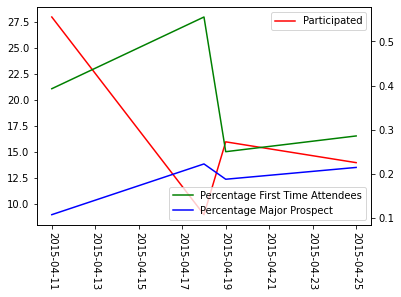


Event name:  San Francisco Terps Game Watch  
Activity Code:  PEASH 
Location Code:  PWSF 
Group Code:  PA9
    Event Date   P  AA  FTA    PFTA  MP     PMP  C   APFTA    APMP
563 2015-01-22  13  32    8  0.6154   0  0.0000  4  0.3508  0.0227
578 2015-02-28  11  33    5  0.4545   1  0.0909  4  0.3508  0.0227
327 2018-02-17   6  30    2  0.3333   0  0.0000  4  0.3508  0.0227
196 2019-02-01   7  33    0  0.0000   0  0.0000  4  0.3508  0.0227


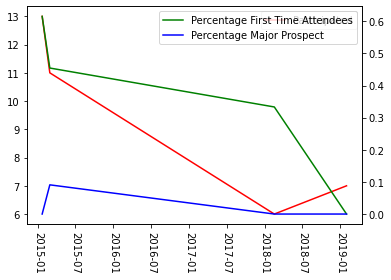


Event name:  Terps in Annapolis 
Activity Code:  PEZTA 
Location Code:  PDAN 
Group Code:  PD9
    Event Date   P  AA  FTA    PFTA  MP     PMP  C   APFTA    APMP
481 2016-03-09  77  41   29  0.3766  12  0.1558  4  0.2056  0.1298
414 2017-02-15  69  40   18  0.2609   5  0.0725  4  0.2056  0.1298
330 2018-02-21  59  41    5  0.0847  12  0.2034  4  0.2056  0.1298
194 2019-01-28  80  45    8  0.1000   7  0.0875  4  0.2056  0.1298


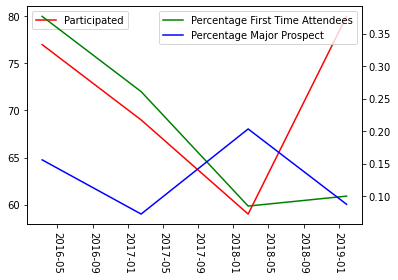


Event name:  Montgomery Cty Terps TPN 
Activity Code:  PEAMT 
Location Code:  PDMC 
Group Code:  PC9
    Event Date   P  AA  FTA    PFTA  MP     PMP  C   APFTA   APMP
459 2015-11-17  24  41   10  0.4167   4  0.1667  4  0.4101  0.156
463 2015-12-10  41  45   16  0.3902   6  0.1463  4  0.4101  0.156
490 2016-03-29  20  44   10  0.5000   4  0.2000  4  0.4101  0.156
398 2018-06-06  18  48    6  0.3333   2  0.1111  4  0.4101  0.156


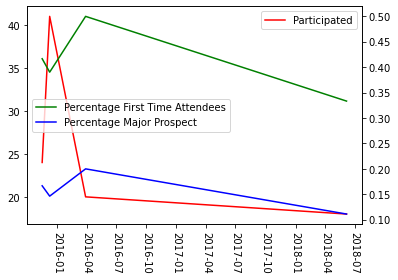


Event name:  LA Terps Happy Hour  
Activity Code:  PEALH 
Location Code:  PWLA 
Group Code:  PS9
    Event Date   P  AA  FTA    PFTA  MP     PMP  C   APFTA    APMP
515 2016-06-15  61  44   33  0.5410  10  0.1639  3  0.2624  0.0661
389 2018-05-20   7  32    1  0.1429   0  0.0000  3  0.2624  0.0661
280 2019-06-13  29  34    3  0.1034   1  0.0345  3  0.2624  0.0661


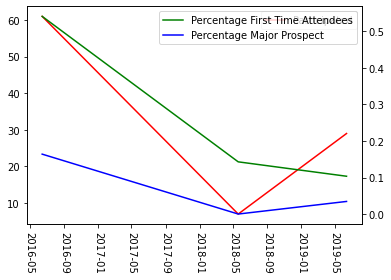


Event name:  Table For Terps 
Activity Code:  PESTT 
Location Code:  PDNA 
Group Code:  PIZ
    Event Date   P  AA  FTA    PFTA  MP  PMP  C   APFTA  APMP
224 2019-03-04   5  27    0  0.0000   0  0.0  3  0.0256   0.0
253 2019-04-04  13  21    1  0.0769   0  0.0  3  0.0256   0.0
270 2019-04-29   5  21    0  0.0000   0  0.0  3  0.0256   0.0


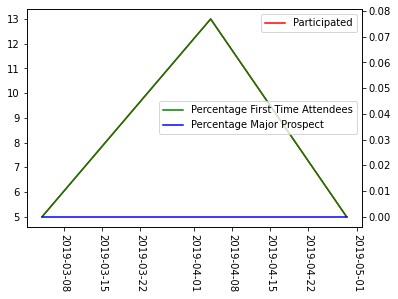


Event name:  UMD Staff Alumni Happy Hour 
Activity Code:  PEASA 
Location Code:  PDON 
Group Code:  PS9
    Event Date   P  AA  FTA    PFTA  MP  PMP  C   APFTA  APMP
127 2018-10-09  27  39   12  0.4444   0  0.0  3  0.1794   0.0
209 2019-02-19  32  37    3  0.0938   0  0.0  3  0.1794   0.0
51  2019-10-29  34  40    0  0.0000   0  0.0  3  0.1794   0.0


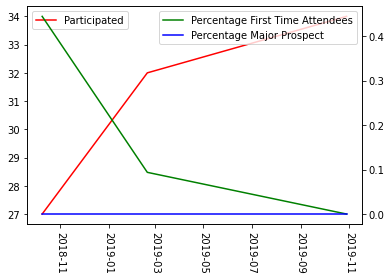


Event name:  Northern NJ Terps TPN 
Activity Code:  PEANJ 
Location Code:  PNNJ 
Group Code:  PC9
    Event Date   P  AA  FTA    PFTA  MP     PMP  C   APFTA    APMP
555 2014-12-11  35  36    6  0.1714   5  0.1429  3  0.1567  0.1017
353 2018-03-26  22  42    5  0.2273   2  0.0909  3  0.1567  0.1017
3   2019-07-11  28  45    2  0.0714   2  0.0714  3  0.1567  0.1017


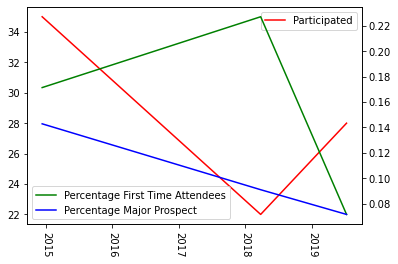


Event name:  Seattle Terps Do Good Event  
Activity Code:  PEAED 
Location Code:  PWSE 
Group Code:  PO9
    Event Date  P  AA  FTA    PFTA  MP  PMP  C   APFTA  APMP
326 2018-02-12  7  42    3  0.4286   0  0.0  3  0.1429   0.0
156 2018-11-14  3  31    0  0.0000   0  0.0  3  0.1429   0.0
177 2018-12-19  3  39    0  0.0000   0  0.0  3  0.1429   0.0


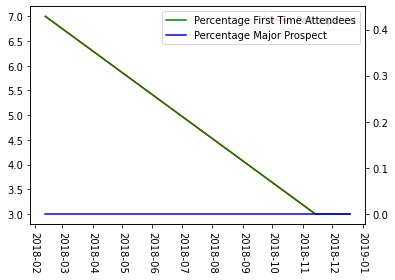


Event name:  Seattle Terps Networking Event 
Activity Code:  PEAEA 
Location Code:  PWSE 
Group Code:  PC9
    Event Date   P  AA  FTA    PFTA  MP     PMP  C   APFTA   APMP
312 2017-12-09  12  32    3  0.2500   0  0.0000  3  0.3426  0.037
318 2018-01-27   3  44    0  0.0000   0  0.0000  3  0.3426  0.037
136 2018-10-18   9  36    7  0.7778   1  0.1111  3  0.3426  0.037


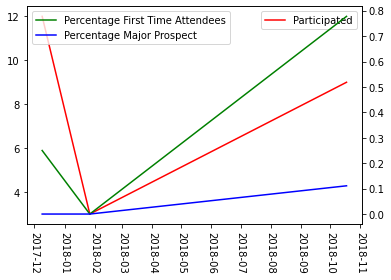


Event name:  Latino Alumni Network Brunch 
Activity Code:  PEALB 
Location Code:  PDNA 
Group Code:  PSL
    Event Date   P  AA  FTA    PFTA  MP  PMP  C   APFTA  APMP
512 2016-06-12  38  26   27  0.7105   0  0.0  3  0.4208   0.0
396 2018-06-03  29  27   16  0.5517   0  0.0  3  0.4208   0.0
277 2019-06-08  14  26    0  0.0000   0  0.0  3  0.4208   0.0


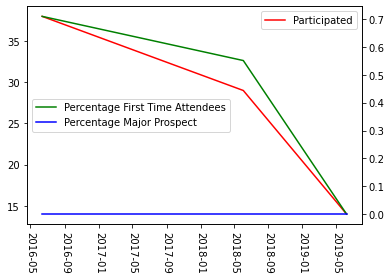


Event name:  Boston Terps Game Watch  
Activity Code:  PEAMG 
Location Code:  PNBO 
Group Code:  PC9
    Event Date   P  AA  FTA    PFTA  MP  PMP  C   APFTA  APMP
577 2015-02-28  18  30   11  0.6111   0  0.0  3  0.3981   0.0
104 2018-09-15   6  29    3  0.5000   0  0.0  3  0.3981   0.0
162 2018-11-28  12  32    1  0.0833   0  0.0  3  0.3981   0.0


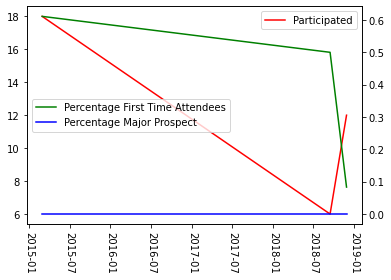


Event name:  Las Vegas Terps Game Watch  
Activity Code:  PEALV 
Location Code:  PWNA 
Group Code:  PA9
    Event Date  P  AA  FTA    PFTA  MP  PMP  C   APFTA  APMP
573 2015-02-24  8  37    5  0.6250   0  0.0  3  0.3393   0.0
213 2019-02-23  4  45    1  0.2500   0  0.0  3  0.3393   0.0
242 2019-03-30  7  47    1  0.1429   0  0.0  3  0.3393   0.0


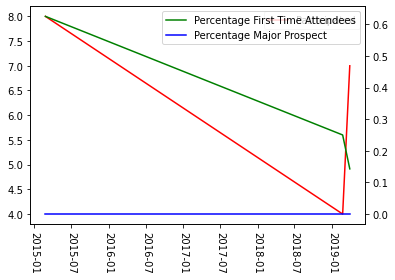


Event name:  Terp Thon Alumni Brunch  
Activity Code:  PEATT 
Location Code:  PDNA 
Group Code:  PST
    Event Date   P  AA  FTA    PFTA  MP     PMP  C  APFTA    APMP
419 2017-03-04  26  24   18  0.6923   0  0.0000  3  0.321  0.0079
336 2018-03-03  32  25    6  0.1875   0  0.0000  3  0.321  0.0079
274 2019-06-02  84  38    7  0.0833   2  0.0238  3  0.321  0.0079


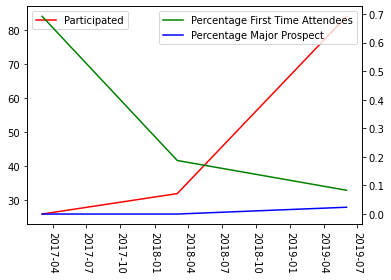


Event name:  Howard County Game Watch  
Activity Code:  PEAHG 
Location Code:  PDHC 
Group Code:  PA9
    Event Date    P  AA  FTA    PFTA  MP     PMP  C   APFTA    APMP
314 2018-01-11  140  40   63  0.4500  18  0.1286  3  0.3405  0.1381
122 2018-10-06    7  48    4  0.5714   2  0.2857  3  0.3405  0.1381
218 2019-02-27   20  48    0  0.0000   0  0.0000  3  0.3405  0.1381


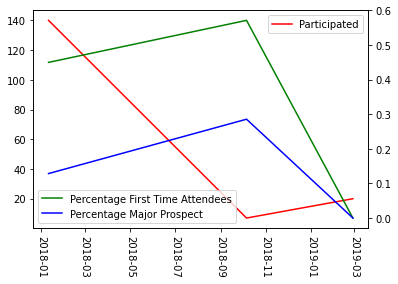


Event name:  NoVA Terps Happy Hour 
Activity Code:  PEAVH 
Location Code:  PDNV 
Group Code:  PS9
    Event Date   P  AA  FTA    PFTA  MP     PMP  C   APFTA    APMP
585 2015-03-13  19  27    5  0.2632   0  0.0000  3  0.1964  0.0362
382 2018-05-03  46  31   15  0.3261   5  0.1087  3  0.1964  0.0362
61  2019-11-09   4  45    0  0.0000   0  0.0000  3  0.1964  0.0362


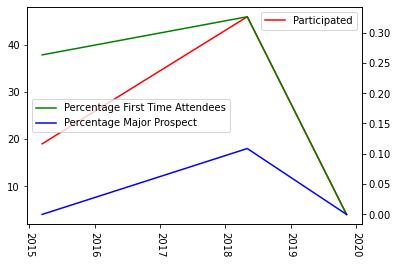


Event name:  NoVA Terps Game Watch  
Activity Code:  PEAVG 
Location Code:  PDNV 
Group Code:  PA9
    Event Date   P  AA  FTA    PFTA  MP     PMP  C   APFTA    APMP
551 2014-12-03   9  40    5  0.5556   1  0.1111  3  0.4222  0.1407
565 2015-02-04  45  41   17  0.3778   4  0.0889  3  0.4222  0.1407
476 2016-02-27   9  50    3  0.3333   2  0.2222  3  0.4222  0.1407


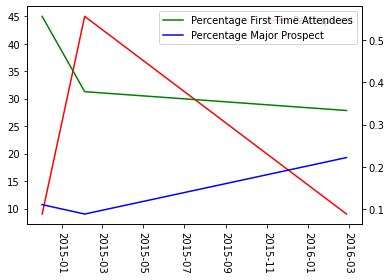


Event name:  Leadership Conference 
Activity Code:  PEALC 
Location Code:  PDON 
Group Code:  PC9
    Event Date    P  AA  FTA    PFTA  MP     PMP  C   APFTA    APMP
302 2017-10-26   79  36    8  0.1013  16  0.2025  3  0.0548  0.0786
153 2018-11-09   86  39    2  0.0233   2  0.0233  3  0.0548  0.0786
67  2019-11-15  100  38    4  0.0400   1  0.0100  3  0.0548  0.0786


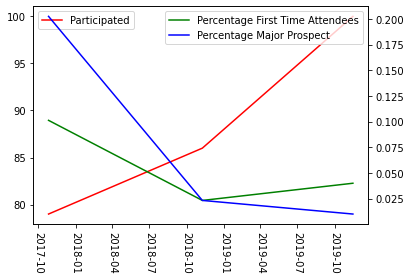


Event name:  PG Terps Game Watch 
Activity Code:  PEAPW 
Location Code:  PDPG 
Group Code:  PA9
    Event Date   P  AA  FTA    PFTA  MP     PMP  C   APFTA    APMP
107 2018-09-15  13  55   11  0.8462   5  0.3846  3  0.3077  0.1674
184 2019-01-18  13  45    1  0.0769   0  0.0000  3  0.3077  0.1674
211 2019-02-21  17  62    0  0.0000   2  0.1176  3  0.3077  0.1674


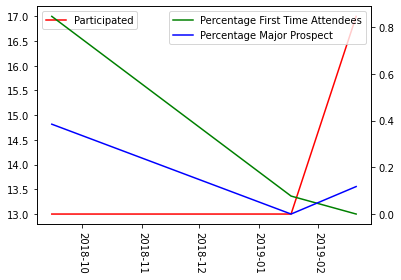


Event name:  Lifetime Member Wall Unveiling  
Activity Code:  PEZLW 
Location Code:  PDON 
Group Code:  PM9
    Event Date    P  AA  FTA    PFTA  MP     PMP  C   APFTA    APMP
532 2014-10-18  118  53   48  0.4068  37  0.3136  3  0.3454  0.2674
455 2015-11-07   87  51   27  0.3103  26  0.2989  3  0.3454  0.2674
408 2016-10-01  116  44   37  0.3190  22  0.1897  3  0.3454  0.2674


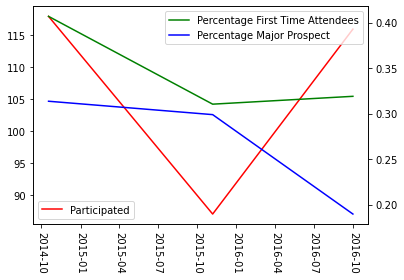


Event name:  Baltimore Terps TPN 
Activity Code:  PEABP 
Location Code:  PDBA 
Group Code:  PS9
    Event Date   P  AA  FTA    PFTA  MP     PMP  C  APFTA    APMP
488 2016-03-23  16  39    2  0.1250   3  0.1875  3  0.134  0.0792
300 2017-10-18  20  30    4  0.2000   1  0.0500  3  0.134  0.0792
147 2018-11-02  13  42    1  0.0769   0  0.0000  3  0.134  0.0792


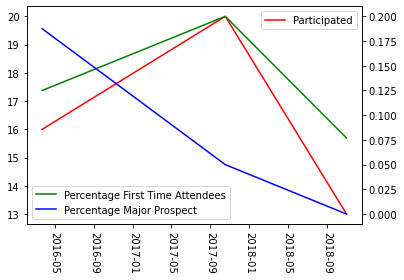


Event name:  Baltimore Mornings with Maryland 
Activity Code:  PEABM 
Location Code:  PDBA 
Group Code:  PC4
    Event Date   P  AA  FTA    PFTA  MP     PMP  C   APFTA    APMP
78  2018-08-03  10  27    3  0.3000   0  0.0000  3  0.1588  0.0499
139 2018-10-23  17  33    3  0.1765   1  0.0588  3  0.1588  0.0499
42  2019-10-24  22  46    0  0.0000   2  0.0909  3  0.1588  0.0499


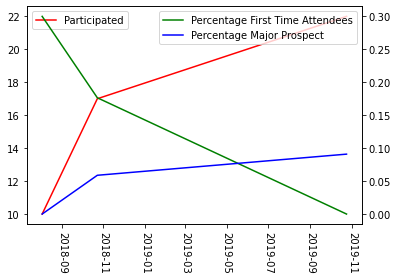


Event name:  Baltimore Terps Business Connect 
Activity Code:  PEABU 
Location Code:  PDBA 
Group Code:  PS9
    Event Date   P  AA  FTA    PFTA  MP     PMP  C   APFTA    APMP
339 2018-03-07  26  43    0  0.0000   2  0.0769  2  0.0357  0.1099
152 2018-11-08  28  48    2  0.0714   4  0.1429  2  0.0357  0.1099

Event name:  Meet Maryland Lunch, Naples 
Activity Code:  PEANL 
Location Code:  PSNA 
Group Code:  PS9
    Event Date   P  AA  FTA    PFTA  MP     PMP  C   APFTA    APMP
350 2018-03-23  39  68   18  0.4615  18  0.4615  2  0.2525  0.3177
174 2018-12-14  23  65    1  0.0435   4  0.1739  2  0.2525  0.3177

Event name:  Baltimore Terps Career Panel  
Activity Code:  PEABC 
Location Code:  PDBA 
Group Code:  PC9
    Event Date   P  AA  FTA    PFTA  MP  PMP  C   APFTA  APMP
560 2015-01-14  18  37   11  0.6111   0  0.0  2  0.3368   0.0
64  2019-11-12  16  30    1  0.0625   0  0.0  2  0.3368   0.0

Event name:  Tucson Terps: Joint Football Watch Party with Purdue Alumni Club of Southern

Event name:  NY Terps Alumnae Networking Dinner  
Activity Code:  PEANA 
Location Code:  PNNY 
Group Code:  PCW
    Event Date   P  AA  FTA    PFTA  MP     PMP  C   APFTA    APMP
622 2014-06-24  44  41    0  0.0000   9  0.2045  2  0.1923  0.1792
574 2015-02-26  13  43    5  0.3846   2  0.1538  2  0.1923  0.1792

Event name:  NoVa Terps Business Leaders Meetup 
Activity Code:  PEANB 
Location Code:  PDNV 
Group Code:  PC9
    Event Date   P  AA  FTA    PFTA  MP     PMP  C   APFTA    APMP
172 2018-12-12  15  44    0  0.0000   1  0.0667  2  0.0714  0.1476
193 2019-01-28  35  49    5  0.1429   8  0.2286  2  0.0714  0.1476

Event name:  NoVA Terps TPN 
Activity Code:  PEAVT 
Location Code:  PDNV 
Group Code:  PC9
    Event Date   P  AA  FTA    PFTA  MP     PMP  C   APFTA    APMP
500 2016-04-27  17  39    5  0.2941   3  0.1765  2  0.2304  0.1438
516 2016-06-28  18  44    3  0.1667   2  0.1111  2  0.2304  0.1438

Event name:  Financial Literacy TPN 
Activity Code:  PESFL 
Location Code:  PDON

In [10]:
for i in grouped.index:
    df.loc[df[df['combined'] == i].index, 'C'] = grouped.loc[i, 'count']
    temp = df.loc[df[df['combined'] == i].index, :].sort_values('Event Date')
    temp.drop(["LCD"],axis = 1, inplace = True, errors='ignore')
    df.loc[df[df['combined'] == i].index, 'APFTA'] = temp['PFTA'].mean()
    temp['APFTA'] = temp['PFTA'].mean()
    df.loc[df[df['combined'] == i].index, 'APMP'] = temp['PMP'].mean()
    temp['APMP']= temp['PMP'].mean()
    if grouped.loc[i, 'count'] == 1:
        continue
    print('Event name: ', temp.iloc[0]['Event Name'], '\n'\
          'Activity Code: ', temp.iloc[0]['AC'],'\n'\
          'Location Code: ', temp.iloc[0]['LC'],'\n'\
          'Group Code: ', temp.iloc[0]['GC'])
    print(temp.iloc[:,4:-2])
    if grouped.loc[i, 'count'] > 2:
        x = temp['Event Date'].sort_values()
        y1 = temp['P']
        y2 = temp['PFTA']
        y3 = temp['PMP']
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.plot(x,y1,label = 'Participated', color = 'red')
        ax.tick_params(axis='x', rotation=270)
        ax.legend(loc=0)
        ax2 = ax.twinx()
        ax2.plot(x,y2,label = 'Percentage First Time Attendees',color = 'green')
        ax2.plot(x,y3,label = 'Percentage Major Prospect', color = 'blue')
        ax2.legend(loc=0)
        plt.show()
    # print(int(temp.iloc[0]['P']<=temp.iloc[1]['P'])+int(temp.iloc[0]['P']==temp.iloc[1]['P']))
    count_growing = count_growing.append({'combined': i,
                                          'P': int(temp.iloc[0]['P']<=temp.iloc[1]['P'])+int(temp.iloc[0]['P']==temp.iloc[1]['P']),
                                          'PFTA': int(temp.iloc[0]['PFTA']<=temp.iloc[1]['PFTA'])+int(temp.iloc[0]['PFTA']==temp.iloc[1]['PFTA']),
                                          'PMP': int(temp.iloc[0]['PMP']<=temp.iloc[1]['PMP'])+int(temp.iloc[0]['PMP']==temp.iloc[1]['PMP'])}, ignore_index=True)
    print()
# print(count_growing)

In [11]:
df = df[(df['P']>5)|(df['C']>1)]
df.index = pd.RangeIndex(start=1, stop=len(df.index) + 1, step=1)
print(df['AC'].count())

596


In [12]:
print(count_growing)

                                              combined    P  PFTA  PMP
0                 PEABG baltimore terps game watch PA9  0.0   1.0  2.0
1                        PEADG dc terps game watch PA9  1.0   1.0  0.0
2                   PEASW seattle terps game watch PA9  0.0   0.0  2.0
3           PEAMC montgomery city terps game watch PA9  0.0   1.0  1.0
4                        PEANG ny terps game watch PA9  0.0   1.0  1.0
5                          PEZFT football tailgate PA9  1.0   0.0  1.0
6                    PEAGW denver terps game watch PS9  0.0   0.0  2.0
7                              PEZRC ring ceremony PSS  1.0   1.0  1.0
8          PEACA dc dc terps csuite alumni meet up PC4  1.0   0.0  0.0
9                                  PEABQ apaan bbq PSA  0.0   0.0  2.0
10              PEANW northern nj terps game watch PA9  0.0   1.0  0.0
11           PEZMB member basketball pregame event PHM  0.0   0.0  0.0
12                     PEZMM maryland in manhattan PS9  1.0   1.0  0.0
13    

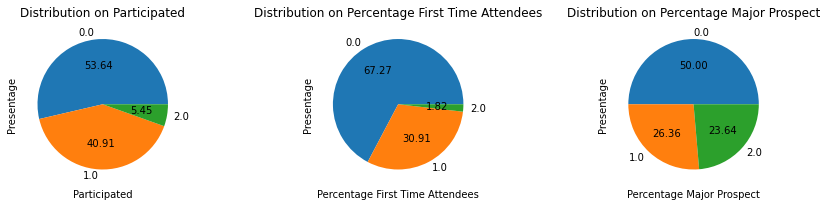

In [13]:
plt.figure(figsize=(15,3))
# From left to right, report distribution on 
# Participated
plt.subplot(131)
count_growing["P"].value_counts().sort_index().plot(kind='pie', autopct="%.2f")
plt.xlabel("Participated")
plt.ylabel("Presentage")
plt.title("Distribution on Participated")
# Participated
plt.subplot(132)
count_growing["PFTA"].value_counts().sort_index().plot(kind='pie', autopct="%.2f")
plt.xlabel("Percentage First Time Attendees")
plt.ylabel("Presentage")
plt.title("Distribution on Percentage First Time Attendees")
# Participated
plt.subplot(133)
count_growing["PMP"].value_counts().sort_index().plot(kind='pie', autopct="%.2f")
plt.xlabel("Percentage Major Prospect")
plt.ylabel("Presentage")
plt.title("Distribution on Percentage Major Prospect")
plt.show()

In [14]:
df1 = df.copy()
df1.drop(["Event Name", "LCD", "No", "Yes", "APFTA", "APMP", "combined"],\
         axis = 1, inplace = True, errors='ignore')
le = preprocessing.LabelEncoder()
for x in df1.columns:
    if df1[x].dtypes=='object':
       df1[x]=le.fit_transform(df[x].astype(str))
df1.head()

AC  LC  GC Event Date   P  AA  FTA    PFTA  MP     PMP  C  EM
1  304   6  30 2019-07-06  63  52    5  0.0794  12  0.1905  5   7
2  165  24   9 2019-07-10   7  56    1  0.1429   0  0.0000  0   7
3  148  20   9 2019-07-11  28  45    2  0.0714   2  0.0714  6   7
4  162  22  30 2019-07-11   3  34    0  0.0000   0  0.0000  5   7
5  164  22  30 2019-07-14  22  38    3  0.1364   0  0.0000  0   7

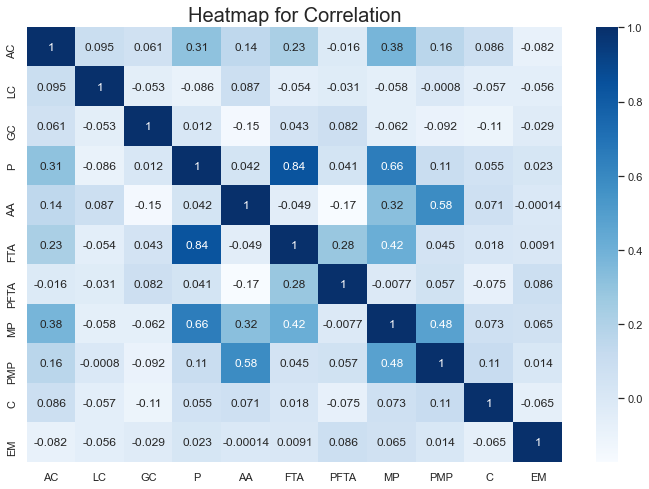

In [15]:
sb.set(rc = {'figure.figsize':(12,8)})
ax = plt.axes()
sb.heatmap(df1.corr(), cmap="Blues", annot=True,ax=ax)
plt.title("Heatmap for Correlation", fontsize =20)
plt.show()

In [16]:
df1 = df.copy()
df1['APFTA'] = df1['APFTA']/df1['C']
df1['APMP'] = df1['APMP']/df1['C']

In [17]:
fig = px.treemap(df1, path=["LC", "combined"], values="P",title="Treemap of Distribution on Participants, devided by location code")  
fig.show() 

In [18]:
fig = px.treemap(df1, path=["LC", "combined"], values="APFTA",title="Treemap of Distribution on Average Percentage First Time Attendees, devided by location code")  
fig.show() 

In [19]:
fig = px.treemap(df1, path=["LC", "combined"], values="APMP", title = "Treemap of Distribution on Average Percentage Major Prospect, devided by location code")  
fig.show() 

In [20]:
fig = px.treemap(df1, path=["GC", "combined"], values="P",title="Treemap of Distribution on Participants, devided by group code")  
fig.show() 

In [21]:
fig = px.treemap(df1, path=["GC", "combined"], values="APFTA",title="Treemap of Distribution on Average Percentage First Time Attendees, devided by group code")  
fig.show() 

In [22]:
fig = px.treemap(df1, path=["GC", "combined"], values="APMP", title = "Treemap of Distribution on Average Percentage Major Prospect, devided by group code")  
fig.show() 

In [23]:
df['calculation'] = df['APFTA']/df['PFTA'].mean()+df['APMP']/df['PMP'].mean()
df.head()

<ipython-input-23-0c0f0808766b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Event Name     AC    LC  \
1                            Ocean City Summer Party  PEZOC  PDES   
2  Neurodiversity on Campus and in the Workplace ...  PEAPC  POWE   
3                              Northern NJ Terps TPN  PEANJ  PNNJ   
4  Philly Terps: Young Alumni Happy Hour Summer S...  PEAP1  PNPH   
5           Philly Terps Suite Night at the Ballpark  PEAP4  PNPH   

                         LCD   GC Event Date   P  AA  FTA    PFTA  MP     PMP  \
1       CP DMV-Eastern Shore  PS9 2019-07-06  63  52    5  0.0794  12  0.1905   
2          CP Online-Webinar  PC9 2019-07-10   7  56    1  0.1429   0  0.0000   
3           CP Northeast-NNJ  PC9 2019-07-11  28  45    2  0.0714   2  0.0714   
4  CP Northeast-Philadelphia  PS9 2019-07-11   3  34    0  0.0000   0  0.0000   
5  CP Northeast-Philadelphia  PS9 2019-07-14  22  38    3  0.1364   0  0.0000   

   C   APFTA    APMP                                           combined  EM  \
1  2  0.1807   0.185                  PEZOC ocean city summer party PS9   7   
2  1  0.1429     0.0  PEAPC neurodiversity on campus and in the work...   7   
3  3  0.1567  0.1017                    PEANJ northern nj terps tpn PC9   7   
4  2  0.0714     0.0  PEAP1 philly terps young alumni happy hour sum...   7   
5  1  0.1364     0.0  PEAP4 philly terps suite night at the ballpark...   7   

  calculation  
1      2.4034  
2      0.5083  
3      1.5258  
4      0.2542  
5      0.4852

In [24]:
df.sort_values('calculation', ascending=False)['combined'].unique()[:20]

array(['PEACA dc terps csuite alumni meet up PC4',
       'PEATE tawes crab and clam bake PD9',
       'PEZAT donna c aldridge afternoon tea PH9',
       'PEAHH howard county happy hour P99',
       'PEACA dc dc terps csuite alumni meet up PC4',
       'PEAAR pg terps guided arboretum tour P99',
       'PEZHF hall of fame ceremony PH9', 'PE788 dinner for 12 terps PSZ',
       'PEZPT terps  penn state tailgate PA9',
       'PEZ14 2014 foster farms bowl tailgate PA9',
       'PEZTI big ten tournament meet up indy PA9',
       'PEASF sofl terps tailgate PA9',
       'PEASB sofl terps boca museum of art tour PU9',
       'PEAEH engr terps happy hour PS9',
       'PEATW atlanta terps game watch PA9',
       'PEAJK meet maryland life of anacting surgeon PC9',
       'PEZBR golden terps brunch PS9',
       'PEAEB engr terps bethesda event PS9',
       'PEAHC houston terps crab feast PS9',
       'PEALL la terps la galaxy game PA9'], dtype=object)

### Explore the difference in factors between online activities and offline activities.

In [25]:
df['Online'] = 'No'
df.loc[df.LCD == "CP Online-Webinar", "Online"] = "Yes"
df

<ipython-input-25-feb346b07ebe>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Event Name     AC    LC  \
1                              Ocean City Summer Party  PEZOC  PDES   
2    Neurodiversity on Campus and in the Workplace ...  PEAPC  POWE   
3                                Northern NJ Terps TPN  PEANJ  PNNJ   
4    Philly Terps: Young Alumni Happy Hour Summer S...  PEAP1  PNPH   
5             Philly Terps Suite Night at the Ballpark  PEAP4  PNPH   
6                           San Diego Day at the Races  PEAND  PWSD   
7                                            APAAN BBQ  PEABQ  PDNA   
8                         Boston Terps Summer Send-Off  PEAB7  PNBO   
9    Career Conversation: Work Smarter, Not Harder ...  PEAC2  PDMC   
10                  Navigating the Home Buying Process  PEAPC  POWE   
11                        Union Station Tour and Taste  PEAU3  PDDC   
12                             Denver Terps Crab Feast  PEADC  PWDE   
13                  Terp Entrepreneur Networking Event  PEAE1  PDCP   
14                        Montgomery County Crab Feast  PEACR  PDMC   
15                     LA Terps Crab Feast and Cookout  PEAL3  PWLA   
16                     DC Terps C-Suite Alumni Meet Up  PEACA  PDNA   
17                                   Bootstrapped Live  PEAB8  PDDC   
18   Local Leaders: A Conversation with Roger Berko...  PEZLS  PNBO   
19                  Dallas Fort Worth Terps Game Watch  PEADW  PSDF   
20                     Montgomery Cty Terps Game Watch  PEAMC  PDMC   
21                               Philly Terps Tailgate  PEAP3  PNPH   
22                       NY Terps Yankees vs. Orioles   PEAYO  PNNY   
23              Foundations of Building Wealth Webinar  PEAFL  POWE   
24                   Day at the Farm: Butler's Orchard  PEABX  PDMC   
25              Northern Virginia Networking Breakfast  PEA2N  PDNV   
26                         Blue Ridge Terps Game Watch  PEARG  PDBR   
27                    Fall Social in Montgomery County  PEAFA  PDMC   
28   Tucson Terps: Joint Football Watch Party with ...  PEAT6  PWTU   
29   History of Civil Rights in Baltimore Walking Tour  PEAC4  PDBA   
30                        Southern MD Terps Crab Feast  PEASC  PDSO   
31    Implementing the Disney Culture in the Workplace  PEAD1  PDMC   
32   How to Write the Greatest Job Application of Y...  PEAPD  POWE   
33                                   Football Tailgate  PEZFT  PDON   
34                        Northern NJ Terps Game Watch  PEANW  PNNJ   
35                   Prince George's Terps Suite Party  PEASP  PDON   
36                      Terps in the San Francisco Bay  PEZSF  PWSF   
37                                         Terps in LA  PEZLH  PWLA   
38   Baltimore in the 21st Century: The Future of t...  PEAB9  PDBA   
39                    Baltimore Mornings with Maryland  PEABM  PDBA   
40                  Dallas Fort Worth Terps Game Watch  PEADW  PSDF   
41                                 DC Terps Game Watch  PEADG  PDDC   
42                        Northern NJ Terps Game Watch  PEANW  PNNJ   
43                                   NetWorkout Boston  PEAN2  PNBO   
44                    Mornings with Maryland Northeast  PEAMW  PNBO   
45                                   NetNite UMBA 2019  PEAUN  PDON   
46                         UMD Staff Alumni Happy Hour  PEASA  PDON   
47                             LAN Homecoming Tailgate  PEAU1  PDON   
48                                San Diego Game Watch  PEADX  PWSD   
49                 Homecoming Student & Alumnae Brunch  PEAA5  PDON   
50             Montgomery County Beer and Wine Tasting  PEAWN  PDMC   
51                                 UMD Does Light City  PEAL1  PDBA   
52                         Blue Ridge Terps Game Watch  PEARG  PDBR   
53                     Montgomery Cty Terps Game Watch  PEAMC  PDMC   
54                               NoVA Terps Happy Hour  PEAVH  PDNV   
55                            Seattle Terps Game Watch  PEASW  PWSE   
56            Maryland Night at the Washington Wizards  PEA3N  PDDC 

In [26]:
df1 = pd.get_dummies(df['Online'])
df = pd.concat([df,df1], axis = 1)

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

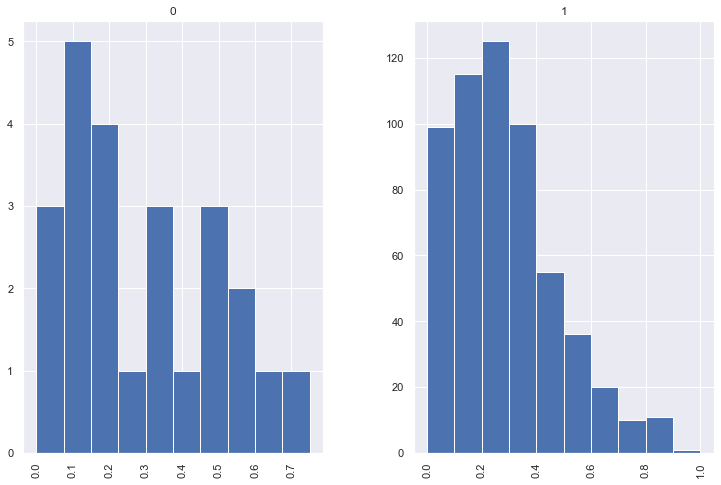

In [27]:
df.hist(column ='APFTA',
        by = 'No')

array([<AxesSubplot:title={'center':'No'}>,
       <AxesSubplot:title={'center':'Yes'}>], dtype=object)

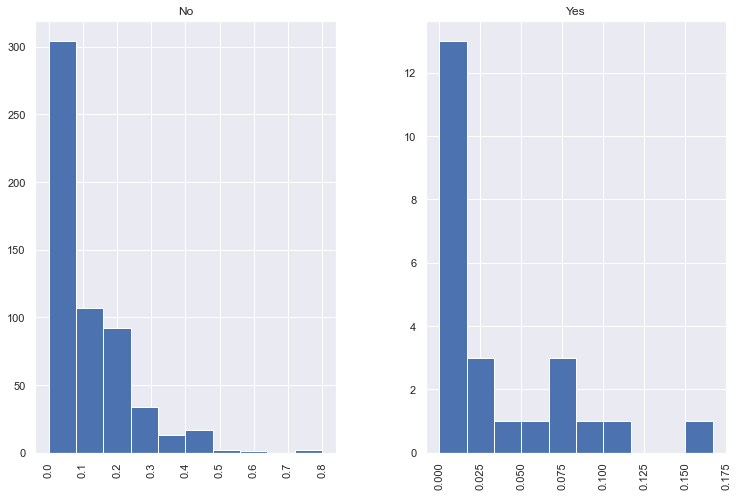

In [28]:
df.hist(column ='APMP',
        by = 'Online')

In [29]:
grouped1 = df.groupby(['combined', 'Yes'])
grouped_pct = grouped1["PMP"]
grouped_pct.agg('mean').sort_values(ascending=False).head(10)

combined                                     Yes
PEACA dc terps csuite alumni meet up PC4     0      0.7997
PEZAT donna c aldridge afternoon tea PH9     0      0.5909
PEATE tawes crab and clam bake PD9           0      0.5455
PEZHF hall of fame ceremony PH9              0      0.4848
PEACA dc dc terps csuite alumni meet up PC4  0      0.4724
PE788 dinner for 12 terps PSZ                0      0.4505
PEZBR golden terps brunch PS9                0      0.4255
PEZTI big ten tournament meet up indy PA9    0      0.4225
PEZAG alumni awards gala PH9                 0      0.4206
PEZ14 2014 foster farms bowl tailgate PA9    0      0.4110
Name: PMP, dtype: float64

In [30]:
onlinedf = df[df["Yes"] == 1]
grouped1 = onlinedf.groupby(['combined', 'Yes'])
grouped_pct = grouped1["PFTA"]
online_yes = grouped_pct.agg('mean').sort_values(ascending = False).head(10)

In [31]:
onlinedf = df[df["Yes"] == 1]
grouped1 = onlinedf.groupby(['combined', 'Yes'])
grouped_pct = grouped1["PMP"]
online_yes = grouped_pct.agg('mean').sort_values(ascending = False).head(10)
online_yes

combined                                                                          Yes
PEAPC virtual and augmented reality opportunities for investors and creators PC9  1      0.1667
PEABI why your business value matters PC9                                         1      0.1111
PEABI is vc money right for your company PC9                                      1      0.0909
PEAPC making the most out of terp deals PC9                                       1      0.0769
PEALE self leadership and happiness PC9                                           1      0.0690
PEAPD career transitions how to change lanes or advance forward with ease PC4     1      0.0667
PEAVB umd alumni virtual book club PC9                                            1      0.0585
PEAPC how women rise breaking the habits holding you back PC9                     1      0.0385
PEAPD how networking leads to great business success PC4                          1      0.0312
PEAPD how to write the greatest job application of

In [32]:
onlinedf = df[df["No"] == 1]
grouped1 = onlinedf.groupby(['combined', 'No'])
grouped_pct = grouped1["PFTA"]
online_no = grouped_pct.agg('mean').sort_values(ascending = False).head(10)
online_no

combined                                      No
PEAEH engr terps happy hour PS9               1     1.0000
PEAYB rg federal hill yoga  brunch PSY        1     0.8889
PEAHS insights to the hiring process sem PCS  1     0.8750
PEASK south korea reception PS9               1     0.8642
PESWD wind down wednesday PSS                 1     0.8608
PEAHP lambda pride holiday party PSK          1     0.8571
PEALL la terps la galaxy game PA9             1     0.8333
PEABE rg the bar method class PSY             1     0.8333
PEAHC houston terps crab feast PS9            1     0.8333
PEAKM meetgreet w yumi hogan PS9              1     0.8182
Name: PFTA, dtype: float64

In [33]:
onlinedf = df[df["No"] == 1]
grouped1 = onlinedf.groupby(['combined', 'No'])
grouped_pct = grouped1["PMP"]
online_no = grouped_pct.agg('mean').sort_values(ascending = False).head(10)
online_no

combined                                     No
PEACA dc terps csuite alumni meet up PC4     1     0.7997
PEZAT donna c aldridge afternoon tea PH9     1     0.5909
PEATE tawes crab and clam bake PD9           1     0.5455
PEZHF hall of fame ceremony PH9              1     0.4848
PEACA dc dc terps csuite alumni meet up PC4  1     0.4724
PE788 dinner for 12 terps PSZ                1     0.4505
PEZBR golden terps brunch PS9                1     0.4255
PEZTI big ten tournament meet up indy PA9    1     0.4225
PEZAG alumni awards gala PH9                 1     0.4206
PEZ14 2014 foster farms bowl tailgate PA9    1     0.4110
Name: PMP, dtype: float64

In [34]:
#what are the average top months in term of events
function = ['count', 'mean', 'max']
for i in df.iloc[0:0, 6:12]:
    monthdf = df.groupby(['EM'])
    topmon = monthdf[i]
    month = topmon.agg(function)
    print(i, month)

P     count      mean   max
EM                       
1      35   32.3143   206
2      65   31.8000   177
3      71   31.7746   149
4      79   67.2025   629
5      37   55.7568   346
6      38   49.2632   217
7      17  126.1765  1657
8      27   28.6296    81
9      50   35.1200   261
10     78   55.8974   597
11     62   37.3226   343
12     37   46.6486   257
AA     count     mean  max
EM                     
1      35  38.6571   58
2      65  42.0000   70
3      71  39.6901   68
4      79  38.5570   61
5      37  42.4865   72
6      38  39.7632   74
7      17  42.1176   62
8      27  37.2222   53
9      50  40.8600   59
10     78  40.2564   67
11     62  39.0968   64
12     37  41.2703   65
FTA     count     mean  max
EM                     
1      35   7.9429   63
2      65   8.8769  110
3      71   9.6056   80
4      79  20.3671  507
5      37  23.4595  261
6      38  10.5000   74
7      17  48.4118  702
8      27   8.6296   70
9      50  13.5400  139
10     78  14.0769  191
11 

In [35]:
#what are the top events each month
function = ['count', 'mean', 'max']
for i in df.iloc[0:0, 6:12]:
    topMon_event = df.groupby(['EM'])
    pct = topMon_event["combined", i]
    month = topmon.agg(function)
    top = pct.agg('max')
    print(top)

                                       combined     P
EM                                                   
1                  PEZTA terps in annapolis PD9   206
2                  PEZTA terps in annapolis PD9   177
3   PEZTO big ten tournament meetup chicago PA9   149
4                       PEZRC ring ceremony PSS   629
5                  PEZRO fearless rockville PS9   346
6                 PEZTT terrapin taste fest PS9   217
7                   PEZTH terps on the hill PD9  1657
8        PEAU3 union station tour and taste PS9    81
9   PEZSB terp small business owners netwrk PC9   261
10     PEZSF terps in the san francisco bay PS9   597
11         PEZPT terps  penn state tailgate PA9   343
12        PEZTC member night at the clarice PHM   257
                                       combined  AA
EM                                                 
1                  PEZTA terps in annapolis PD9  58
2                  PEZTA terps in annapolis PD9  70
3   PEZTO big ten tournament meetup 

<ipython-input-35-2397bec2357a>:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

<ipython-input-35-2397bec2357a>:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

<ipython-input-35-2397bec2357a>:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

<ipython-input-35-2397bec2357a>:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

<ipython-input-35-2397bec2357a>:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

<ipython-input-35-2397bec2357a>:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



           P       AA      FTA    PFTA      MP     PMP      No     Yes
EM                                                                    
1    32.3143  38.6571   7.9429  0.2263  2.5143  0.0606  1.0000  0.0000
2    31.8000  42.0000   8.8769  0.2410  4.7538  0.1060  0.9538  0.0462
3    31.7746  39.6901   9.6056  0.2496  4.1690  0.1033  0.9859  0.0141
4    67.2025  38.5570  20.3671  0.2791  7.9114  0.1120  0.9747  0.0253
5    55.7568  42.4865  23.4595  0.3031  7.9189  0.1455  1.0000  0.0000
6    49.2632  39.7632  10.5000  0.2403  5.8158  0.0898  0.9737  0.0263
7   126.1765  42.1176  48.4118  0.2757  9.7059  0.1097  0.8824  0.1176
8    28.6296  37.2222   8.6296  0.3545  1.9259  0.0816  0.8519  0.1481
9    35.1200  40.8600  13.5400  0.4095  6.7800  0.1406  0.9200  0.0800
10   55.8974  40.2564  14.0769  0.3016  9.2308  0.1099  0.9487  0.0513
11   37.3226  39.0968  10.0323  0.2504  4.7419  0.0788  0.9677  0.0323
12   46.6486  41.2703  13.1892  0.2707  8.2432  0.1102  0.9730  0.0270
Int64I

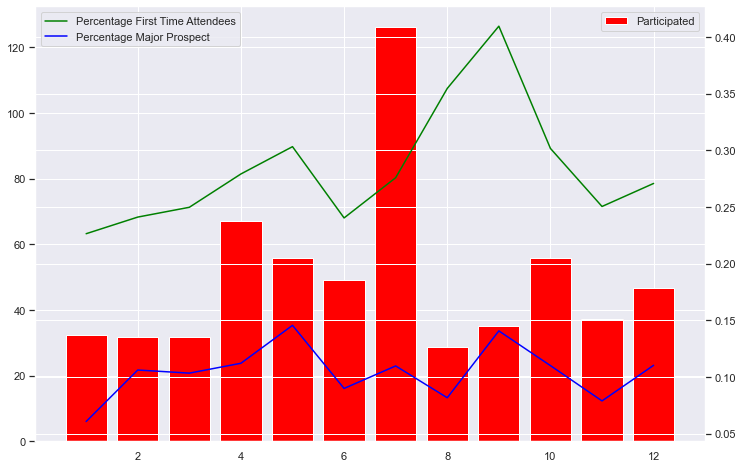

In [41]:
grouped2 = df.groupby(["EM"]).mean()
print(grouped2)
x = grouped2.index
print(x)
y1 = grouped2["P"]
y2 = grouped2['PFTA']
y3 = grouped2['PMP']
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(x,y1,label = 'Participated', color = 'red')
ax.legend(loc=0)
ax2 = ax.twinx()
ax2.plot(x,y2,label = 'Percentage First Time Attendees',color = 'green')
ax2.plot(x,y3,label = 'Percentage Major Prospect', color = 'blue')
ax2.legend(loc=0)
plt.show()